# Spiral Animation \###

In [1]:
import pandas as pd
import numpy as np
from plotnine import (
    ggplot,
    aes,
    geom_path,
    theme,
    theme_void,
    lims
)
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

### Spiral Animation

*How to create Animations*

The `PlotnineAnimation` methods takes a sequence of plots and animates
them. The best way to create the sequence is to use a function that
generates plots.

**NOTE**: When creating the plots make sure *all the plots* have scales
with the same limits for each aesthetic, including the `x` and `y`
aesthetics.

In [2]:
# Parameters used to control the spiral
n = 100
tightness = 1.3
kmin = 1
kmax = 25
num_frames = 25
theta = np.linspace(-np.pi, np.pi, n)

def plot(k):
    # For every plot we change the theta
    _theta = theta*k
    
    # Polar Equation of each spiral
    r = tightness*_theta
    
    df = pd.DataFrame({
        'theta': _theta,
        'r': r,
        'x': r*np.sin(_theta),
        'y': r*np.cos(_theta)
    })

    p = (ggplot(df)
         + geom_path(aes('x', 'y', color='theta'), size=1)
         + lims(
             # All the plots have scales with the same limits
             x=(-130, 130),
             y=(-130, 130),
             color=(-kmax*np.pi, kmax*np.pi)
         )
         + theme_void()
         + theme(
             aspect_ratio=1,
             # Make room on the right for the legend
             subplots_adjust={'right': 0.85}
         )
    )
    return p

# It is better to use a generator instead of a list
plots = (plot(k) for k in np.linspace(kmin, kmax, num_frames))
ani = PlotnineAnimation(plots, interval=100, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQACeO5tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
CRtliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAP8j+NuVUetgS4AAABOwA
0gTEKQHUFwGotxX3RkUk9jmAREk8DRojzeVU04QIOFHFdBUw/VgAtIEpucWNeCSC0zFJwtdmgGhb
1xxURoPRC9FpAf/Gf407MLltfG4tCEE3QnMmfd1Bo6IySPcinHeMU6LkmwIUFWEO12CL65kSl1Ag
/NKdkNM31tulgaHTY/Hev19diTj1qfjXTcL5HD0mqAFfvNKzX64Ss3r0LcjJIR9oDXLr+/U/PE3K
fCR0EewlXaMSkYIEemccdBcx42YMAdgn6Rv5QGpSkrw3IH6wmj6QqpCdhAwALCCtmk1x8rjqCal3
+ipEwFIkmD31mXeaI/C7GnfL/TonB0zreIX3Y/uDXqS3t3TO4ZwM11q8cRS7v0jtxvsll6rvGSpQ
VA19DX/jt1hYVLW/JoKOhCpZ6+t5yTO7fzKj8peUQu02yPlBF9xMfv+6lardnV8ZPIgLGFjZLcF+
d7bmxg+3uenXhJC6QE13IKqetvt5P0Uf0J+Z2/OFrglfOz3ZR9HDC5tX+HfJiavd9UUz2cJQY/1u
LcsIA9flbyoAONHCyJvf0L8s9h4xsQ7VXIzIRaXfyCHe++IH7ly7FmCQOesM3v653ET81z/U3BbF
DMqZj/uVgtop5keBkE5JIjZUVQ0vqXj5IyuzWzLzEPlaIOmkI2sBO/ePVWy4WytadEBH1sgZBfAP
MfFB+0UvmTuw4OisB1S1HFmCsMV+rCjeAjtAAQ2EO1ykpkooj2Xs1Y5J9NtOGMgXeJf99g7OFrlW
Eq45jNUa2eB2FVRkgKjoUfXDuSKKtCwVFZhNlgjrc9IPWWG7tX4wU8E+q0IfnwcNjFftc3YZwZr6
WxvXnG2QXYDA9ei0X7cLB5uHNN8fMaRX69TU5VC/9sZJdp5U3JaZPqfF9pjCyu7+Ou/fmHM+bRmz
j2X0GozJ1n8c6tuD2O5KdEa1SPxWL7c+7Kb+nox/vs+qKymk7Ei1CRPVyCdswwkSGEvElz90BDAy
K/6YO0UksaafBWfaRH+qCKNEZTmoNDdosRUrHCcsAxxDdUlJaURx+CRYqj1ojAN3+lzyh6KjjuPE
RSmG/FMDXqsBwk1z5xFUhpwoG4WTHo6PL1c6Dm7O6+d1hdIu6Xsx6JCue5EVab9rF7DBGuAlQ+Op
HI0pLIFXKadLcvlTVE5+gpvFgoNZYy+kStguOKRJLNavCKsZYzzSzsG30Bjatz+tn4rEy73Jt9Q0
dxNwuhyHFMb0W5AWfKK5qznsahssrmvUdg86Go/J3lPFD3CSYrbwjo5NjGWCO57O7KcP9SVkNO5V
7RhuPsxx0KVcBV3S9e3iwPl1EY2Vtkrstcd2WGG4h5AcDf3rMYQ9g9sfkyIiU4ZGA5Y/i0TaPjSv
ecN2F9U9lbYGylX/Ra0ZxxwZY++VoaVbU53x8wJfXldxcm5BEc7heXQLQAn//atd4LnadtVoyUZ8
hC+zD0KDbVs95djM1ICkUR7pp6r7w7rXLuhjhnGBYCpZ3a4jl3qPhms6xgaTD79tNdjFYn37qfaM
2QpwApCIieVAFb/2UTluniWC887Zg8grWxNznp2z+gygbVoJBq2vDd39gPC00C1+Cbg32jHw5eZX
SmTPN0x6oPH8HtDANpfBhIlGW/72huX9KqX+YWlPtVszIGTC5R9HSskgju1volTapCjTAPjcSzPp
VpvRKr13dVUC9483ct6Aam2EpBJUrm7JBYTKnPqSxzxOyIJffE+8TqZEkazq6bopx32fkAeH5i7/
KxZCV7ga7VdLK3L7gwrwBtbUxwgLgABgJbUWKOKS4i/LPCjNnzNXKwPGo6h4xRlLnxolipvyd5f/
hM5iyAXeciNH80lTjqjpF6DlZYyJ34TkTvsHAgItRph4xq424uW5wm3HjJdW68Z9LP2WnrqX/V6z
cJkBL0tKeAZnbxSLCuOto+YKrzJZM9t0C4Gy5Th8AWy1qDLHWGftPxsAhULzzUm57Z59TsjFWVFd
IK9ILhQbtRlwOi5LVmyuQ9MJSwTeoA4CNgAAAwA85izxBfFS8rZ74QqONTQov1c0AnT2DxlvxMbp
FMjL8cvBf0RKHOhnHM5h5GhR9Pn7tzCDk0DGzwfJuFJ4hrskhW+3nqagrkCw9eyCmhYwgvHj8pb0
7kJS1CFEb8Nmlmym44dW0a4fiCkI8NF3G6dh/jqXRXKO3xSRf5sqx0NM3xRfvRYoOk01XBtu06VM
bu0z5GDESoAynz6VTqS5yOZx45dh//3/tYikhRdWbYfctMWfdHbJ0Y9dpgZsxu5+dxDPKCobXV5y
k2U/wx1mxdOnLnUW8tPl5TsdmakxlR7AI4bbQjqYWi3mT+0MqvvGAAAaplH1dzBnsSq4rTfyRVyn
JlWzEYkzT9A+AuWfYeE+EKWHedlUKQhyNcG7gvrhAAoWiBDte0Q+apgKL31jH7/gLED4nCXaG4ke
m3yurZ0fLkbfythlGJ9EAdr6trcpTrZFKAqkdL14Zq/7gvxuhR0zGxYY8Q17yu4NygAbAMtIYHfR
a/1BwfMNzAF8T65nDCYEohnng+xHp4meUr4TcMXPoCASQXAAUd7kLe9tIHI/4nJd4Uy48MAa/orz
9iuRYFIEV3RWk7hNAZw2o3GmN49Xhc2mXJUJW4WRZTuywmX6lcp/WL3I/CFQ7jGicf+XIBEfPqb/
j+JenmZHgQisnKnRPlFkAPW0sb/k7a9USUKKgYHY7abHP9KuDqMzM9uEVcglis4BCRhXEQn4R3yU
SqErSoMErisGZvJvUKYB4UheQqyvYZL9eLaVe+34Ub62eYNoT1ksm7teN9SS+cIfzMbYcVI7V4sl
sInjKBSGQ4LEQf4V5gxUY

The final image of the spiral

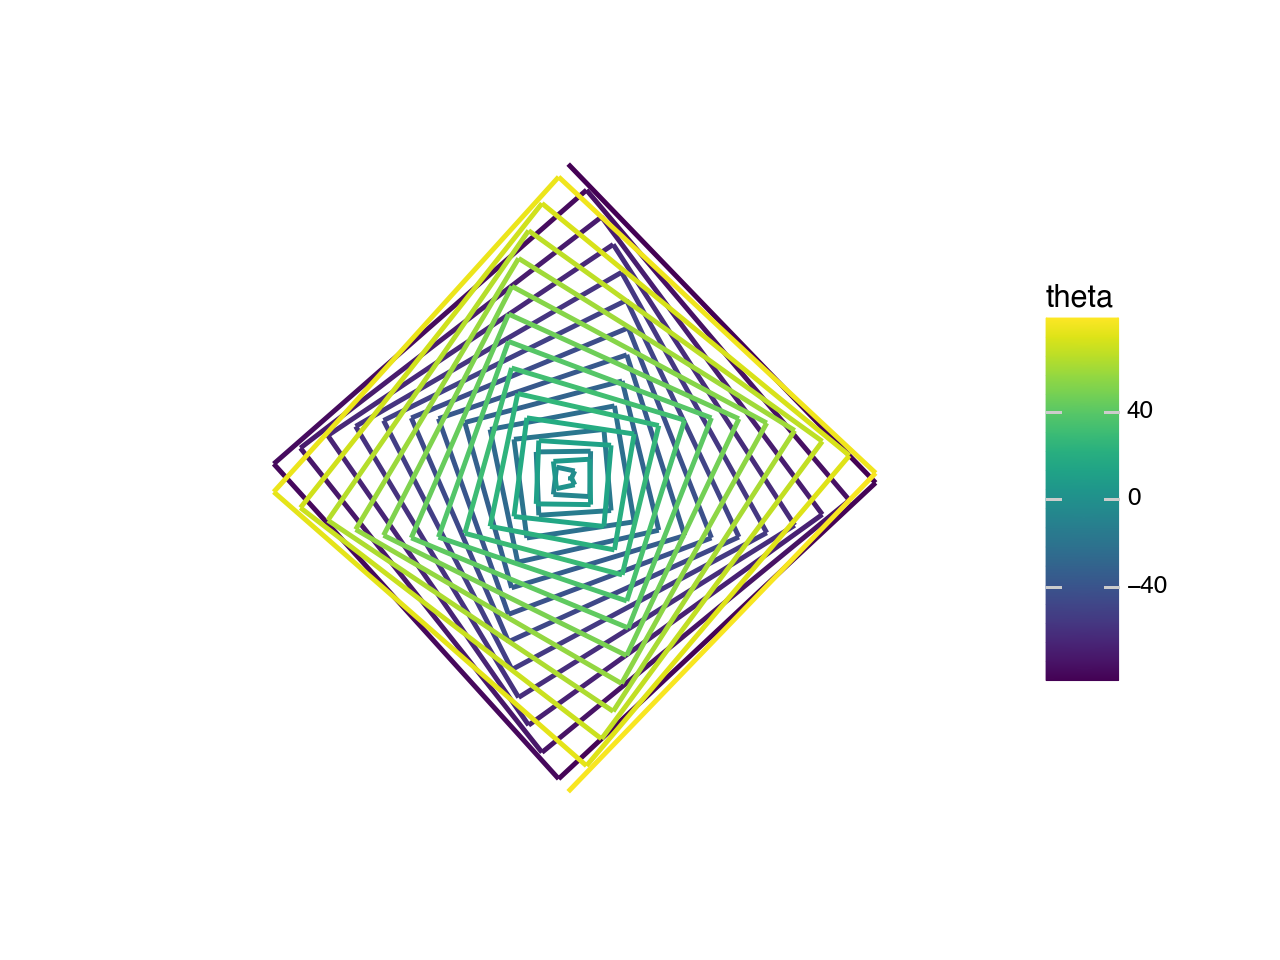

In [3]:
# Gallery Plot

plot(kmax)